In [ ]:
%pip install pandas-datareader
%pip install pandas
%pip install yfinance

In [ ]:

import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as fig
import datetime as dt
from datetime import datetime
import numpy as np

RECEBENDO DADOS DO USUÁRIO

In [ ]:

data_user = input("Informe a partir de qual data deseja buscar os dados (dd/mm/aaaa)")
data_inicio = datetime.strptime(data_user, '%d/%m/%Y').date()
data_fim = dt.date.today()

ver = False
while ver == False :
    ativos = input("Informe no mínimo 4 ativos separados por vírgula para que a análise seja concluída.")
    lista_ativos = ativos.split(',')

    if len(lista_ativos) > 3:
        """print(data_inicio)
        print(data_fim)"""
        print(lista_ativos)
        ver = True
    else:
        print("Por favor insira no mínimo 4 ativos")


BUSCANDO DADOS NO YAHOO FINANCE

In [ ]:
df = web.DataReader(lista_ativos,'yahoo', data_inicio, data_fim)
tabela_ativos = pd.DataFrame(round(df['Close'],2))
#tabela_ativos = tabela_ativos.dropna()
tabela_ativos

CALCULANDO VARIAÇÃO E DESVIO PADRÃO

In [ ]:
variancia = np.var(tabela_ativos)
desvio_padrao = np.std(tabela_ativos)

#print(str(round(variancia,2)))
#print(str(round(desvio_padrao,2)))

tabela_variancia = pd.DataFrame({'variancia': round(variancia,2)})
tabela_variancia = tabela_variancia.sort_values(by='variancia')
tabela_variancia = tabela_variancia.head(3)
tabela_variancia_ativos = pd.DataFrame(tabela_variancia.index)

tabela_ativos = tabela_ativos.loc[:,tabela_variancia_ativos['Symbols']] 
tabela_ativos


    RISCO VERSUS RETORNO DA CARTEIRA

Text(0.5, 1.0, 'Retorno esperado vs Risco esperado')

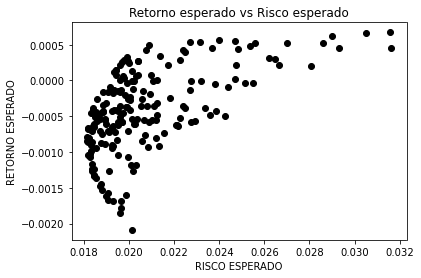

In [91]:
retorno_diario = tabela_ativos/tabela_ativos.shift(1)-1
retorno_medio = retorno_diario.mean()
sigma = retorno_diario.cov()

"""pesos_alocacao_dinheiro = np.array([0.10,0.80,0.10])

retorno_carteira = np.sum(pesos_alocacao_dinheiro*retorno_medio)
risco = np.sqrt(np.dot(pesos_alocacao_dinheiro.T, np.dot(sigma, pesos_alocacao_dinheiro)))

print("Retorno esperado: ", str(round(100*retorno_carteira,2)) + " %")
print("Risco da carteira: ", str(round(100*risco,2)) + " %")"""

vetor_retorno = []
vetor_volatidade = []

for i in range(200):
    pesos_alocacao_dinheiro = np.random.random(len(tabela_variancia_ativos['Symbols']))
    pesos_alocacao_dinheiro = pesos_alocacao_dinheiro/np.sum(pesos_alocacao_dinheiro)
    
    retorno_carteira = np.sum(pesos_alocacao_dinheiro*retorno_medio)
    risco = np.sqrt(np.dot(pesos_alocacao_dinheiro.T, np.dot(sigma, pesos_alocacao_dinheiro)))

    vetor_retorno.append(retorno_carteira)
    vetor_volatidade.append(risco)

fig.plot(vetor_volatidade,vetor_retorno,'ok')
fig.grid
fig.xlabel('RISCO ESPERADO')
fig.ylabel('RETORNO ESPERADO')
fig.title('Retorno esperado vs Risco esperado')
